In [4]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

from IntuitiveAssociations import IADatabase, IAReporter  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
os.path.exists("C:\\!Work\\2023 IA\\IntuitiveAssociations\\sources\\17276_AI_transformed.xlsx")
os.path.dirname("C:\\!Work\\2023 IA\\IntuitiveAssociations\\sources\\17276_AI_transformed.xlsx")

'C:\\!Work\\2023 IA\\IntuitiveAssociations\\sources'

In [8]:
run main.py "C:\\!Work\\2023 IA\\IntuitiveAssociations\\sources\\17509_AI_transformed.xlsx"

Working with this file: C:\!Work\2023 IA\IntuitiveAssociations\sources\17509_AI_transformed.xlsx
Этот проект уже в базе
Отчет готов


In [10]:
reporter = IAReporter()
reporter.BuildJobReport("C:\\!Work\\2023 IA\\IntuitiveAssociations\\sources\\17347_AI_transformed.xlsx")

Этот проект уже в базе
Отчет готов


Yes %    Fast %
IA_CELL IA_AD_BRAND IA_WORDS                           
1       brand       ВДОХНОВЛЯЮЩИЕ    0.672131  0.281030
                    ВКУСНЫЕ          0.860849  0.311321
                    ДОРОГИЕ          0.486553  0.222494
                    КАЧЕСТВЕННЫЕ     0.871429  0.319048
                    МЕЖДУНАРОДНЫЕ    0.750000  0.245283
                    ОРИГИНАЛЬНЫЕ     0.728132  0.309693
                    ПОДЛИННЫЕ        0.824096  0.178313
                    ПОПУЛЯРНЫЕ       0.765550  0.311005
                    ПРЕМИАЛЬНЫЕ      0.575472  0.360849
                    ПРИВЛЕКАТЕЛЬНЫЕ  0.809976  0.266033
                    СОВРЕМЕННЫЕ      0.810304  0.334895
                    СТИЛЬНЫЕ         0.774419  0.293023
2       brand       ВДОХНОВЛЯЮЩИЕ    0.639560  0.327473
                    ВКУСНЫЕ          0.811111  0.300000
                    ДОРОГИЕ          0.465753  0.269406
                    КАЧЕСТВЕННЫЕ     0.852423  0.317181
                    МЕЖДУНАРОДНЫЕ    0.786026  0.240175
                    ОРИГИНАЛЬНЫЕ     0.730684  0.304636
                    ПОДЛИННЫЕ        0.829596  0.188341
                    ПОПУЛЯРНЫЕ       0.786813  0.272527
                    ПРЕМИАЛЬНЫЕ      0.561822  0.318872
                    ПРИВЛЕКАТЕЛЬНЫЕ  0.757174  0.315673
                    СОВРЕМЕННЫЕ      0.751634  0.337691
                    СТИЛЬНЫЕ         0.735808  0.338428
3       brand       ВДОХНОВЛЯЮЩИЕ    0.648193  0.325301
                    ВКУСНЫЕ          0.752381  0.309524
                    ДОРОГИЕ          0.378973  0.259169
                    КАЧЕСТВЕННЫЕ     0.769976  0.314770
                    МЕЖДУНАРОДНЫЕ    0.702830  0.283019
                    ОРИГИНАЛЬНЫЕ     0.751790  0.336516
                    ПОДЛИННЫЕ        0.745679  0.197531
                    ПОПУЛЯРНЫЕ       0.717340  0.306413
                    ПРЕМИАЛЬНЫЕ      0.522353  0.376471
                    ПРИВЛЕКАТЕЛЬНЫЕ  0.763723  0.300716
                    СОВРЕМЕННЫЕ      0.850356  0.342043
                    СТИЛЬНЫЕ         0.719340  0.367925
4       brand       ВДОХНОВЛЯЮЩИЕ    0.688488  0.306998
                    ВКУСНЫЕ          0.817352  0.326484
                    ДОРОГИЕ          0.856132  0.247642
                    КАЧЕСТВЕННЫЕ     0.902494  0.317460
                    МЕЖДУНАРОДНЫЕ    0.849776  0.228700
                    ОРИГИНАЛЬНЫЕ     0.783599  0.323462
                    ПОДЛИННЫЕ        0.881395  0.195349
                    ПОПУЛЯРНЫЕ       0.756944  0.326389
                    ПРЕМИАЛЬНЫЕ      0.765909  0.318182
                    ПРИВЛЕКАТЕЛЬНЫЕ  0.804989  0.328798
                    СОВРЕМЕННЫЕ      0.792325  0.356659
                    СТИЛЬНЫЕ         0.765487  0.365044

# Work with database

In [123]:
#!!!!!!!!!!!!!!!!!!!!!!!!!
# clean database
db.Deserialize('dump.pickle')
db.DropJobs([16956])
db.Serialize('dump.pickle')

In [9]:
db = IADatabase()
db.Deserialize('dump.pickle')


print(db.JobList())
print(db.columns, len(db.columns))
print(db.loc[:, 'IA_WORDS'].cat.categories)

[17224 17234 17240 17262 17258 17277 17261 17291 17269 17301 17278 17285
 17322 17346 17357 17337 17363 17362 17342 17352 17400 16962 17347 17402
 17554 17338 17509 17553 17470 17276]
Index(['JOB_ID', 'JOB_TYPE', 'QST_NO', 'IA_CELL', 'IA_ORD', 'IA_WORDS',
       'IA_MS', 'IA_ANSWER', 'IA_ATTEMP', 'IA_AD_BRAND', 'IA_WTYPE'],
      dtype='object') 11
Index(['ЗАБОТЛИВАЯ', 'ЖИВАЯ', 'СТИЛЬНЫЕ', 'РАДУЮЩИЙ', 'ТРАДИЦИОННАЯ',
       'ИЗВЕСТНАЯ', 'КЛАССНЫЙ', 'ЭФФЕКТИВНАЯ', 'ВКУСНЫЙ', 'БРЕДОВАЯ',
       ...
       'ПОПУЛЯРНЫЙ', 'ВКУСНЫЕ', 'КРЕАТИВНАЯ', 'ЮМОРНАЯ', 'ИННОВАЦИОННАЯ',
       'ПРОГРЕССИВНАЯ', 'ИГРИВАЯ', 'СЫТНАЯ', 'ВЫГОДНАЯ', 'ДОРОГИЕ'],
      dtype='object', length=154)


In [10]:
db.GetTotalNorms()

AttributeError: 'DataFrame' object has no attribute 'GetTotalNorms'

In [11]:
cdb = db.GetCleanDB()
cdb[cdb['Yes %']].groupby(['JOB_TYPE', 'JOB_ID', 'IA_AD_BRAND', 'IA_CELL', 'IA_WORDS'], observed=True)['Fast %'].mean().to_csv('temp.csv', encoding='cp1251')#.groupby(['JOB_TYPE', 'IA_AD_BRAND'], observed=True).mean()

KeyError: 'Yes %'

### Количество уникальных слов по проектам

In [13]:
# уникальные слова по проектам
db.GetCleanDB().groupby(['JOB_TYPE', 'JOB_ID', 'IA_AD_BRAND'], observed=True)['IA_WORDS'].nunique()

JOB_TYPE  JOB_ID  IA_AD_BRAND
ad.look   17224   ad              8
                  brand           9
          17234   ad              8
                  brand          12
          17258   ad              8
                  brand          11
          17261   ad              8
                  brand           8
          17262   ad              8
                  brand           8
          17269   ad              8
                  brand           5
          17276   ad              8
                  brand           7
          17277   ad              8
                  brand          11
          17278   ad              8
                  brand           8
          17285   ad              8
                  brand          10
          17301   ad              8
                  brand          13
          17322   ad              8
                  brand           9
          17337   ad              8
                  brand           9
          17338   ad              

In [14]:
# количество заданий на респондента
tasks = db.GetCleanDB().groupby(['JOB_TYPE', 'JOB_ID', 'QST_NO'], observed=True)['IA_MS'].count().groupby(['JOB_TYPE', 'JOB_ID'], observed=True).median()
# средняя скорость респондента
speed = db.GetCleanDB().groupby(['JOB_TYPE', 'JOB_ID', 'QST_NO'], observed=True)['IA_MS'].mean().groupby(['JOB_TYPE', 'JOB_ID'], observed=True).mean()

In [15]:
tasks_speed = pd.concat([tasks, speed], axis=1).set_axis(['Tasks', 'Speed'], axis='columns').reset_index()
print(tasks_speed)
tasks_speed = tasks_speed[tasks_speed['JOB_ID'] != 16956]

   JOB_TYPE  JOB_ID  Tasks        Speed
0   ad.look   17224   17.0  1001.466053
1   ad.look   17234   20.0   987.650438
2   ad.look   17258   19.0  1008.144005
3   ad.look   17261   16.0  1006.393460
4   ad.look   17262   16.0  1020.344900
5   ad.look   17269   13.0  1028.548824
6   ad.look   17276   15.0  1085.666136
7   ad.look   17277   19.0   926.426470
8   ad.look   17278   16.0   978.736179
9   ad.look   17285   18.0  1026.859681
10  ad.look   17301   21.0  1027.488209
11  ad.look   17322   17.0   981.287354
12  ad.look   17337   17.0   986.974316
13  ad.look   17338   19.0   972.158712
14  ad.look   17346   19.0  1018.288080
15  ad.look   17357   17.0   997.243998
16  ad.look   17362   20.0   992.800943
17  ad.look   17363   14.0  1040.009392
18  ad.look   17400   19.0  1086.125645
19  ad.look   17402   17.0   969.541750
20  ad.look   17470   20.0   947.830116
21  ad.look   17509   16.0  1070.039386
22  ad.look   17553   16.0   953.132071
23  ad.look   17554   19.0   952.419946


<Axes: xlabel='Tasks', ylabel='Speed'>

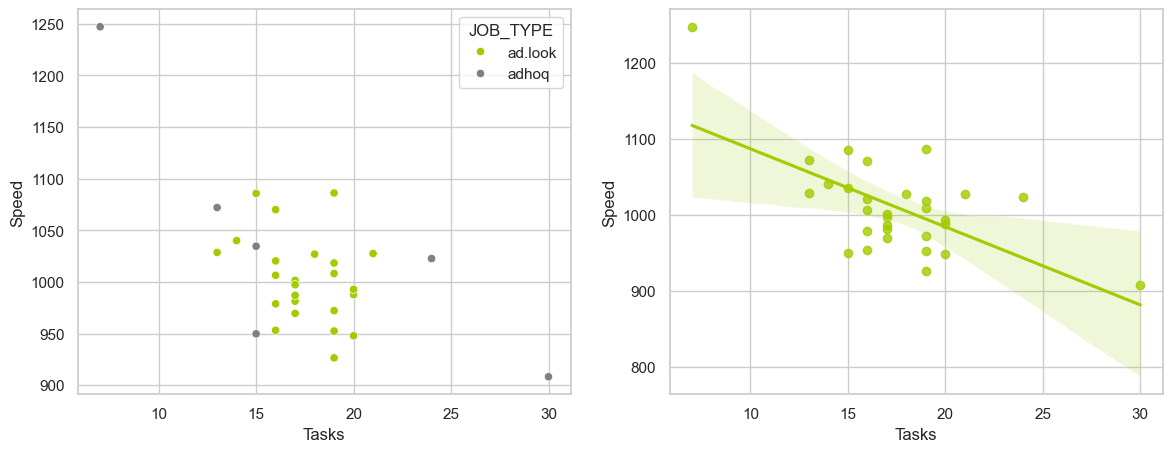

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.scatterplot(tasks_speed, x='Tasks', y='Speed', hue='JOB_TYPE', ax=axs[0])
sns.regplot(tasks_speed, x='Tasks', y='Speed', ax=axs[1])

In [38]:
custom_palette

['#a0cc00', 'grey']

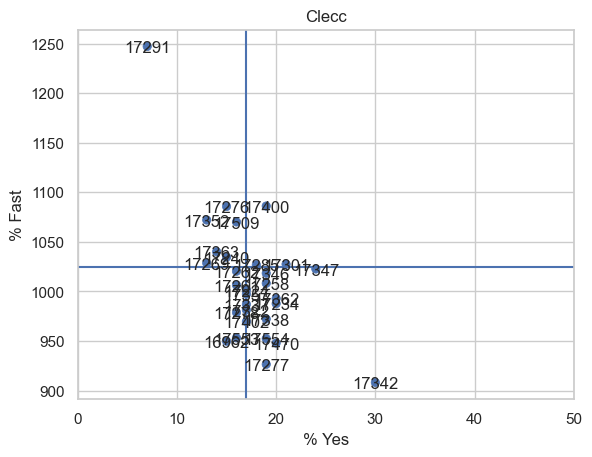

In [36]:
import seaborn.objects as so


plt.rc('axes', labelsize=14, titlesize=100)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=10, color='gray')    # fontsize of the tick labels
plt.rc('ytick', labelsize=10, color='gray')    # fontsize of the tick labels

custom_palette = ["#a0cc00", 'grey'] #"#a0cc00"
sns.set_theme(style="whitegrid", palette=custom_palette)

p = so.Plot(tasks_speed, x='Tasks', y='Speed', text='JOB_ID')\
    .add(so.Dot()).add(so.Text())\
    .label(x='% Yes', y='% Fast', title='Clecc')

fig, ax = plt.subplots()
ax.axvline(17)
ax.axhline(1025)
ax.set(xlabel='% Yes')
ax.set_xlim(0, 50)

p.on(ax).show()

In [157]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(tasks_speed[['Tasks']].values, tasks_speed[['Speed']])
reg.predict([[10], [15], [20], [25]])

array([[1086.60988269],
       [1035.30256884],
       [ 983.99525498],
       [ 932.68794112]])

In [153]:
# количество ячеек на респондента
db.df_.loc[filter_, :].groupby(['JOB_TYPE', 'JOB_ID', 'QST_NO'], observed=True)['IA_CELL'].nunique().groupby(['JOB_TYPE', 'JOB_ID'], observed=True).mean()

JOB_TYPE  JOB_ID
ad.look   17224     1.0
          17234     1.0
          17258     1.0
          17261     1.0
          17262     1.0
          17269     1.0
          17276     1.0
          17277     1.0
          17278     1.0
          17285     1.0
          17301     1.0
          17322     1.0
          17337     1.0
          17338     1.0
          17346     1.0
          17357     1.0
          17362     1.0
          17363     1.0
          17400     1.0
          17402     1.0
          17470     1.0
          17509     1.0
          17553     1.0
          17554     1.0
adhoq     16962     1.0
          17240     1.0
          17291     1.0
          17342     2.0
          17347     2.0
          17352     1.0
Name: IA_CELL, dtype: float64

In [228]:
# expected speed
tasks = pd.DataFrame(db.GetCleanDB().groupby(['JOB_ID', 'QST_NO'], observed=True)['IA_MS'].count().groupby(['JOB_ID'], observed=True).median())
expected_speed = pd.Series(db.ExpectedRespondentSpeed(tasks.values), index=tasks.index)
expected_speed

JOB_ID
16962    1035.302569
17224    1014.779643
17234     983.995255
17240    1035.302569
17258     994.256718
17261    1025.041106
17262    1025.041106
17269    1055.825494
17276    1035.302569
17277     994.256718
17278    1025.041106
17285    1004.518181
17291    1117.394271
17301     973.733792
17322    1014.779643
17337    1014.779643
17338     994.256718
17342     881.380627
17346     994.256718
17347     942.949404
17352    1055.825494
17357    1014.779643
17362     983.995255
17363    1045.564032
17400     994.256718
17402    1014.779643
17470     983.995255
17509    1025.041106
17553    1025.041106
17554     994.256718
dtype: float64

In [208]:
actual_speed = db.GetCleanDB().groupby(['JOB_ID', 'QST_NO'], observed=True)['IA_MS'].mean()
actual_speed

JOB_ID  QST_NO 
16962   1600009     607.933333
        1600012     901.866667
        1600024     932.533333
        1600025     718.000000
        1600030     724.066667
                      ...     
17554   820        1032.894737
        821        1237.105263
        822        1364.166667
        823         552.947368
        830         726.368421
Name: IA_MS, Length: 10740, dtype: float64

In [220]:
resp_speed_koef = (actual_speed / expected_speed).reset_index().set_axis(['JOB_ID', 'QST_NO', 'resp_koef'], axis='columns')

In [223]:
db.df_.merge(resp_speed_koef, how='left', on=['JOB_ID', 'QST_NO'])

,JOB_ID,JOB_TYPE,QST_NO,IA_CELL,IA_ORD,IA_WORDS,IA_MS,IA_ANSWER,IA_ATTEMP,IA_AD_BRAND,IA_WTYPE,resp_koef
0,17224,ad.look,9,1,4,УБЕДИТЕЛЬНАЯ,1262,Yes,1,ad,warm_up,1.001376
1,17224,ad.look,9,1,2,НЕИНТЕРЕСНАЯ,1297,Yes,1,ad,warm_up,1.001376
2,17224,ad.look,9,1,3,ВЕЛИКОЛЕПНАЯ,1090,No,1,ad,warm_up,1.001376
3,17224,ad.look,9,1,1,СЕРАЯ,2314,Yes,1,ad,warm_up,1.001376
4,17224,ad.look,9,1,7,ПРОРЫВНАЯ,1540,No,1,ad,active,1.001376
...,...,...,...,...,...,...,...,...,...,...,...,...
260983,17276,ad.look,639,1,6,НАТУРАЛЬНАЯ,904,Yes,1,brand,active,0.930420
260984,17276,ad.look,639,1,7,КАЧЕСТВЕННАЯ,611,Yes,1,brand,active,0.930420
260985,17276,ad.look,639,1,5,ОБЫЧНАЯ,1615,No,1,brand,active,0.930420
260986,17276,ad.look,639,1,9,ОБЪЕДИНЯЮЩАЯ,943,Yes,1,brand,active,0.930420


In [225]:
db.GetNorms()['IA_MS']

mean         std
JOB_TYPE IA_AD_BRAND IA_ANSWER                         
ad.look  ad          Yes        1062.705838  414.701322
                     No         1083.662473  407.295483
         brand       Yes         884.453087  377.508340
                     No         1065.853016  416.367228
adhoq    ad          Yes                NaN         NaN
                     No                 NaN         NaN
         brand       Yes         940.709657  415.831052
                     No         1132.460122  469.894084

## Test new stuff

In [4]:
db = IADatabase()
db.Deserialize('dump.pickle')

db.ExpectedRespondentSpeed([[10], [15], [20], [25]])

array([1086.60988269, 1035.30256884,  983.99525498,  932.68794112])

In [5]:
db

,JOB_ID,JOB_TYPE,QST_NO,IA_CELL,IA_ORD,IA_WORDS,IA_MS,IA_ANSWER,IA_ATTEMP,IA_AD_BRAND,IA_WTYPE
0,17224,ad.look,9,1,4,УБЕДИТЕЛЬНАЯ,1262,Yes,1,ad,warm_up
1,17224,ad.look,9,1,2,НЕИНТЕРЕСНАЯ,1297,Yes,1,ad,warm_up
2,17224,ad.look,9,1,3,ВЕЛИКОЛЕПНАЯ,1090,No,1,ad,warm_up
3,17224,ad.look,9,1,1,СЕРАЯ,2314,Yes,1,ad,warm_up
4,17224,ad.look,9,1,7,ПРОРЫВНАЯ,1540,No,1,ad,active
...,...,...,...,...,...,...,...,...,...,...,...
3955,17276,ad.look,639,1,6,НАТУРАЛЬНАЯ,904,Yes,1,brand,active
3956,17276,ad.look,639,1,7,КАЧЕСТВЕННАЯ,611,Yes,1,brand,active
3957,17276,ad.look,639,1,5,ОБЫЧНАЯ,1615,No,1,brand,active
3958,17276,ad.look,639,1,9,ОБЪЕДИНЯЮЩАЯ,943,Yes,1,brand,active


In [265]:
db.CalculateFastSlow()
db

,JOB_ID,JOB_TYPE,QST_NO,IA_CELL,IA_ORD,IA_WORDS,IA_MS,IA_ANSWER,IA_ATTEMP,IA_AD_BRAND,IA_WTYPE,resp_koef,mean,std,is_fast,clean
0,17224,ad.look,9,1,4,УБЕДИТЕЛЬНАЯ,1262,Yes,1,ad,warm_up,1.001376,1062.705838,414.701322,,False
1,17224,ad.look,9,1,2,НЕИНТЕРЕСНАЯ,1297,Yes,1,ad,warm_up,1.001376,1062.705838,414.701322,,False
2,17224,ad.look,9,1,3,ВЕЛИКОЛЕПНАЯ,1090,No,1,ad,warm_up,1.001376,1083.662473,407.295483,,False
3,17224,ad.look,9,1,1,СЕРАЯ,2314,Yes,1,ad,warm_up,1.001376,1062.705838,414.701322,,False
4,17224,ad.look,9,1,7,ПРОРЫВНАЯ,1540,No,1,ad,active,1.001376,1083.662473,407.295483,slow,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260983,17276,ad.look,639,1,6,НАТУРАЛЬНАЯ,904,Yes,1,brand,active,0.930420,884.453087,377.508340,slow,True
260984,17276,ad.look,639,1,7,КАЧЕСТВЕННАЯ,611,Yes,1,brand,active,0.930420,884.453087,377.508340,fast,True
260985,17276,ad.look,639,1,5,ОБЫЧНАЯ,1615,No,1,brand,active,0.930420,1065.853016,416.367228,slow,True
260986,17276,ad.look,639,1,9,ОБЪЕДИНЯЮЩАЯ,943,Yes,1,brand,active,0.930420,884.453087,377.508340,slow,True


In [267]:
db.CalculateJob(17224)

,QST_NO,IA_WORDS,is_fast,clean
0,9,УБЕДИТЕЛЬНАЯ,,False
1,9,НЕИНТЕРЕСНАЯ,,False
2,9,ВЕЛИКОЛЕПНАЯ,,False
3,9,СЕРАЯ,,False
4,9,ПРОРЫВНАЯ,slow,True
...,...,...,...,...
4480,1214,НАДЕЖНАЯ,slow,True
4481,1214,АУТЕНТИЧНАЯ,slow,True
4482,1214,ИТАЛЬЯНСКАЯ,slow,True
4483,1214,ТЕПЛАЯ,slow,True


In [240]:
db.df_['Yes'] = (db.df_['IA_ANSWER'] == 'Yes')
db.df_['Fast'] = (db.df_['is_fast'] == 'fast')

In [248]:
db.GetCleanDB().groupby(['JOB_TYPE', 'JOB_ID', 'IA_AD_BRAND', 'IA_CELL', 'IA_WORDS'], observed=True)['Yes'].mean().groupby(['JOB_TYPE', 'IA_AD_BRAND'], observed=True).mean() #.to_csv('temp.csv')

JOB_TYPE  IA_AD_BRAND
ad.look   ad             0.371033
          brand          0.742600
adhoq     brand          0.760317
Name: Yes, dtype: float64

In [251]:
cdb = db.GetCleanDB()

cdb[cdb['Yes']].groupby(['JOB_TYPE', 'JOB_ID', 'IA_AD_BRAND', 'IA_CELL', 'IA_WORDS'], observed=True)['Fast'].mean().groupby(['JOB_TYPE', 'IA_AD_BRAND'], observed=True).mean()

JOB_TYPE  IA_AD_BRAND
ad.look   ad             0.161134
          brand          0.156697
adhoq     brand          0.141375
Name: Fast, dtype: float64

In [278]:
db.GetTotalNorms()

Yes %    Fast %
JOB_TYPE IA_AD_BRAND                    
ad.look  ad           0.371033  0.161134
         brand        0.742600  0.156697
adhoq    brand        0.760317  0.141375

In [25]:
# уникальные слова по респондента
db.df_.groupby(['JOB_TYPE', 'JOB_ID', 'QST_NO'], observed=True)['IA_WORDS'].nunique().groupby(['JOB_TYPE', 'JOB_ID'], observed=True).mean()

JOB_TYPE  JOB_ID
ad.look   17224     23.0
          17234     26.0
          17258     26.0
          17261     23.0
          17262     22.0
          17269     20.0
          17276     22.0
          17277     26.0
          17278     22.0
          17285     25.0
          17301     26.0
          17322     24.0
          17337     24.0
          17338     26.0
          17346     26.0
          17357     24.0
          17362     27.0
          17363     20.0
          17400     26.0
          17402     23.0
          17470     27.0
          17509     23.0
          17553     23.0
          17554     26.0
adhoq     16956     19.0
          16962     20.0
          17240     19.0
          17291      9.0
          17342     20.0
          17347     17.0
          17352     18.0
Name: IA_WORDS, dtype: float64